# Practice Project - 2 : Medical Cost Personal Insurance Datasets

# Problem Statement:
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

# Dataset Discription:
Medical expenses are the costs to treat or prevent an injury or disease,such as health insurance premiumns, hospital visits, and prescriptions. According to analysis data is multivariable.
According to study, smoking,aging are major factors for higher expenses in personal medical expences. For instance, chances of lung cancer are most likely infect the people who are smokers than non-smoker and in obese personality people heart attack rate is higher. Based on certain input features such as age , bmi,,no of dependents,smoker,region medical insurance is calculated.
Task is to train a model to predict Charges Can you accurately predict insurance costs using linear regression models. The result of this analysis is to use patient data to estimate the average medical care expences for such population segments. The results can be used to create actuarial tables that set the price of yearly premiuns higher or lower, depending on the expected treatment costs.

# Attribute Information

Input features: 
1 - age , 
2 - bmi(a Body mass index),
3 - Children(no of dependents) ,
4 - smoker ,
5 - region 
output features:charges

# Reading and Understanding the Data

In [49]:
""""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.
"""
#importing required libraries
import sklearn
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1 : Loading the Dataset

In [50]:
medical_need_df = pd.read_csv("medical_cost_insurance.csv")
medical_need_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
medical_need_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
#Checking the data dimension
medical_need_df.shape 

(1338, 7)

We have 1338 rows and 7 columns including the target column means 6 indenpendent feature and 1 dependent feature 

In [53]:
medical_need_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we notice that age, sex, bmi, children, smoker, region Ananymous in Nature. 

sex, smoker parameters are catagorical in nature with 2 different values each, all rest age, bmi, children are continuous in nature  
cardinality of data(Total no of classes in any particular column)- low cardinality 
i.e. for sex - male, female
         smoker - yes , no
No Null values present in any features i.e. no missing values in any feature column.

Using map function we will convert the catagorical features of sex and smoker column to numeric feature -i.e convert to specific boolean values.do the changes in dataframe using map function 

In [54]:
#Mapping
medical_need_df['sex'] = medical_need_df['sex'].map({'male':0,'female':1})
medical_need_df['smoker'] = medical_need_df['smoker'].map({'yes':1,'no':0})


In [55]:
medical_need_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


# Step 2: Data Visualization

In [56]:
medical_need_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

for column age cardinality(total no of classes present in particulae column) is high need to reduce it.

In [57]:
medical_need_df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [58]:
#Maximum age is 64 and min age is 18. I reduce by combining age in groups as "Young Person","Senior Person","Elder Person"
#bining the age columns
bins = [17,35,55,1000]
age_grps = ["Young person","Senior person","Elder person"]
medical_need_df['Age_lies'] = pd.cut(medical_need_df['age'],bins = bins, labels = age_grps)


In [59]:
medical_need_df.head(15)

,age,sex,bmi,children,smoker,region,charges,Age_lies
0,19,1,27.900,0,1,southwest,16884.92400,Young person
1,18,0,33.770,1,0,southeast,1725.55230,Young person
2,28,0,33.000,3,0,southeast,4449.46200,Young person
3,33,0,22.705,0,0,northwest,21984.47061,Young person
4,32,0,28.880,0,0,northwest,3866.85520,Young person
5,31,1,25.740,0,0,southeast,3756.62160,Young person
6,46,1,33.440,1,0,southeast,8240.58960,Senior person
7,37,1,27.740,3,0,northwest,7281.50560,Senior person
8,37,0,29.830,2,0,northeast,6406.41070,Senior person
9,60,1,25.840,0,0,northwest,28923.13692,Elder person


In [60]:
#again check for uniqueness sort in asc order
medical_need_df.nunique().sort_values()

sex            2
smoker         2
Age_lies       3
region         4
children       6
age           47
bmi          548
charges     1337
dtype: int64

I can see the number of unique values is acolumn
If the no. of unique values <= 40 : Categorical column
If the no. of unique values in a column > 50 : continuos    

In [61]:
medical_need_df['region'].values

array(['southwest', 'southeast', 'southeast', ..., 'southeast',
       'southwest', 'northwest'], dtype=object)

In [62]:
medical_need_df.head(5)

,age,sex,bmi,children,smoker,region,charges,Age_lies
0,19,1,27.900,0,1,southwest,16884.92400,Young person
1,18,0,33.770,1,0,southeast,1725.55230,Young person
2,28,0,33.000,3,0,southeast,4449.46200,Young person
3,33,0,22.705,0,0,northwest,21984.47061,Young person
4,32,0,28.880,0,0,northwest,3866.85520,Young person


# Data Visualization for categorical variables  

"smoker","region","Age_lies" are categorical feature variables, 
we plot box plot between these variables with target variable "charges" to analyaize the correlation between feature variales and target variables.

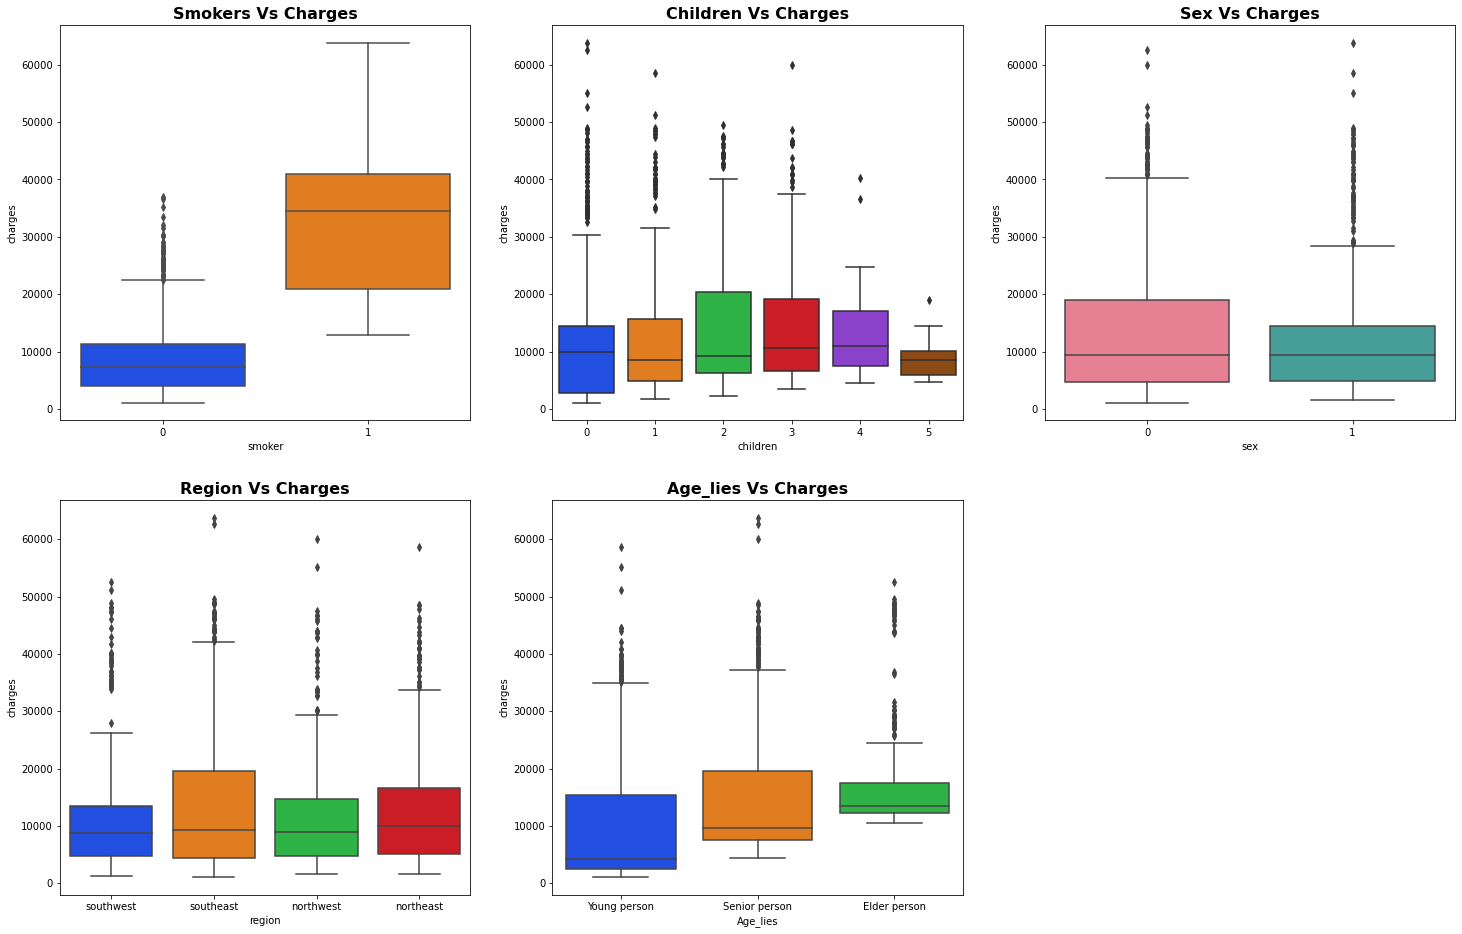

In [63]:
#BOXPLOT 
plt.figure(figsize=(25,16))
plt.subplot(2,3,1)
sns.boxplot(data=medical_need_df, x='smoker', y='charges',palette = 'bright')
plt.title("Smokers Vs Charges",fontweight="bold",size = 16)

plt.subplot(2,3,2)
sns.boxplot(data=medical_need_df, x='children', y='charges',palette = 'bright')
plt.title("Children Vs Charges",fontweight="bold",size = 16)

plt.subplot(2,3,3)
sns.boxplot(data=medical_need_df, x='sex', y='charges',palette = 'husl')
plt.title("Sex Vs Charges",fontweight="bold",size = 16)

plt.subplot(2,3,4)
sns.boxplot(data=medical_need_df, x='region', y='charges',palette = 'bright')
plt.title("Region Vs Charges",fontweight="bold",size = 16)

plt.subplot(2,3,5)
sns.boxplot(data=medical_need_df, x='Age_lies', y='charges',palette = 'bright')
plt.title("Age_lies Vs Charges",fontweight="bold",size = 16)
plt.show()

# Observations: 
From above figure smoker- Medical charges for smoker is higher than Non-smoker
sex- male have higher medical charges than female
Age-lies - Senior persons charged higher


We now find out more sex, smokers, children lets see how it changes by region present in which region by boxplot

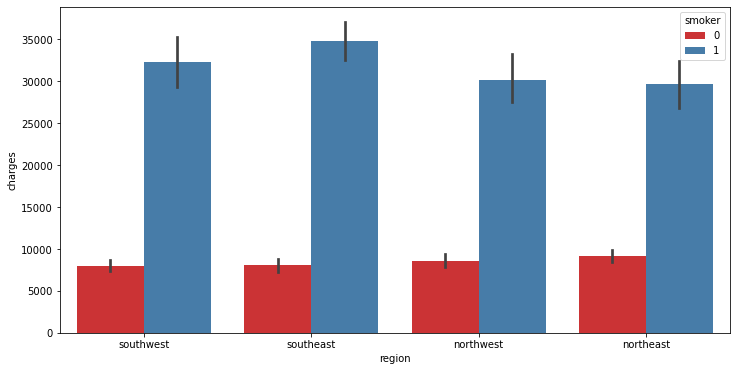

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(data=medical_need_df, x='region', y='charges', hue='smoker', palette='Set1')
plt.show()


# Observation:
Southeast region are highly changed because of smoking habbit is more in southeast area where as northeast region are charged less because of smoking


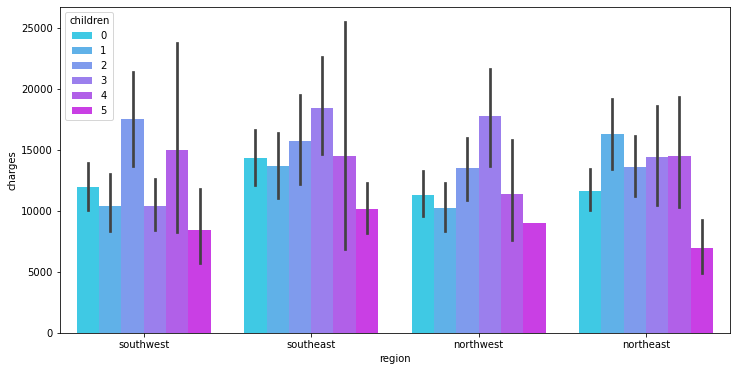

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=medical_need_df, x='region', y='charges', hue='children', palette='cool')
plt.show()


# Observation: 
Southeast region are highly changed because of most families have 4 children in family in this region they are highly charged ,northeast region are lowest medical charged region. 

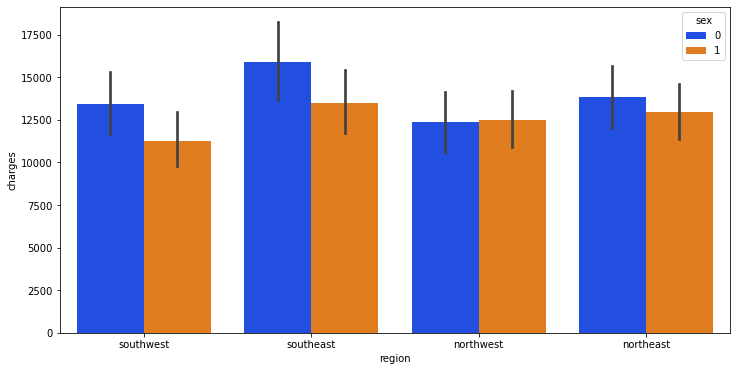

In [66]:
plt.figure(figsize = (12,6))
sns.barplot(data = medical_need_df, x = 'region', y = 'charges', hue = 'sex', palette  ='bright')
plt.show()

# Observation:
From above figure Males from southeast region are highest paying for medical charges among all the region 

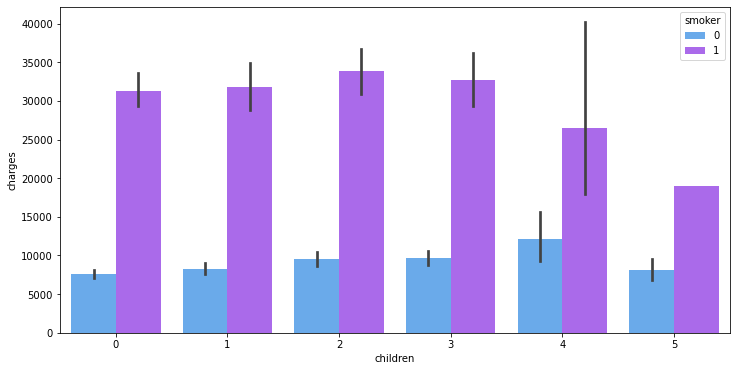

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=medical_need_df, x='children', y='charges', hue='smoker', palette='cool')
plt.show()

# Observation: 
people having more children are Non smoker whereas those having 2 children are charged highly because they are smoker

# Heatmap

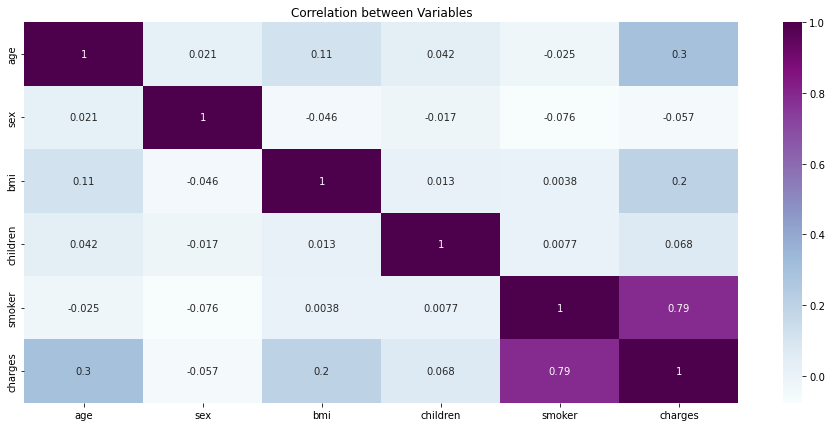

In [68]:
plt.figure(figsize=(16,7))
sns.heatmap(data = medical_need_df.corr(), annot=True, cmap= 'BuPu')
plt.title("Correlation between Variables")
plt.show()

# Data Visualization for numeric variables

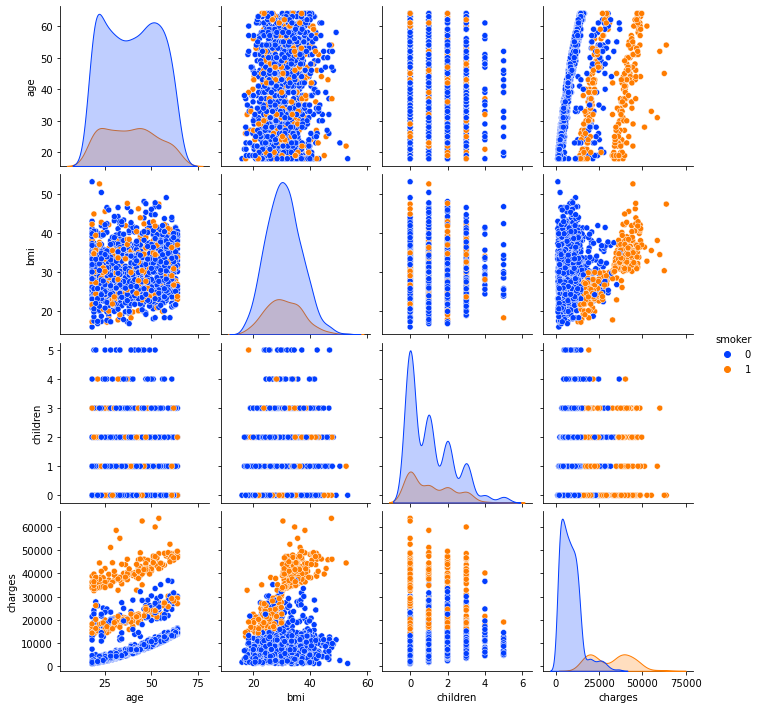

In [69]:
#pairplot  of all numerical variables
sns.pairplot(medical_need_df,vars=['age','bmi','children','charges'],hue = 'smoker',palette='bright')
plt.show()

Observation- 
From about plot we can see the 
- bmi(body mass index ) correlated with chargesi.e our target variable
- Pattern of increasing charges from age vs charge
- smoker and charges are strongly correlated 

# Step:3 Data Preparation

In [70]:
medical_need_df.head(3)

,age,sex,bmi,children,smoker,region,charges,Age_lies
0,19,1,27.90,0,1,southwest,16884.9240,Young person
1,18,0,33.77,1,0,southeast,1725.5523,Young person
2,28,0,33.00,3,0,southeast,4449.4620,Young person


In [76]:
medical_need_df.shape

(1338, 14)

In [71]:
#The get_dummies function is used to convert categorical variables into dummy or indicator variables. A dummy or indicator variable can have a value of 0 or 1.
#get dummy variables region and age range
region = pd.get_dummies( medical_need_df.region, drop_first = True)
Age_lies = pd.get_dummies( medical_need_df.Age_lies, drop_first = True)
children = pd.get_dummies(medical_need_df.children,drop_first=True,prefix='children' )

In [72]:
#adding to original dataframe
medical_need_df = pd.concat([region,Age_lies,children,medical_need_df],axis=1)
medical_need_df.head()

,northwest,southeast,southwest,Senior person,Elder person,children_1,children_2,children_3,children_4,children_5,age,sex,bmi,children,smoker,region,charges,Age_lies
0,0,0,1,0,0,0,0,0,0,0,19,1,27.900,0,1,southwest,16884.92400,Young person
1,0,1,0,0,0,1,0,0,0,0,18,0,33.770,1,0,southeast,1725.55230,Young person
2,0,1,0,0,0,0,0,1,0,0,28,0,33.000,3,0,southeast,4449.46200,Young person
3,1,0,0,0,0,0,0,0,0,0,33,0,22.705,0,0,northwest,21984.47061,Young person
4,1,0,0,0,0,0,0,0,0,0,32,0,28.880,0,0,northwest,3866.85520,Young person


In [73]:
medical_need_df.drop(['region','Age_lies','children','age'],axis=1,inplace=True)
medical_need_df.head()

,northwest,southeast,southwest,Senior person,Elder person,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker,charges
0,0,0,1,0,0,0,0,0,0,0,1,27.900,1,16884.92400
1,0,1,0,0,0,1,0,0,0,0,0,33.770,0,1725.55230
2,0,1,0,0,0,0,0,1,0,0,0,33.000,0,4449.46200
3,1,0,0,0,0,0,0,0,0,0,0,22.705,0,21984.47061
4,1,0,0,0,0,0,0,0,0,0,0,28.880,0,3866.85520


In [75]:
medical_need_df.shape

(1338, 14)

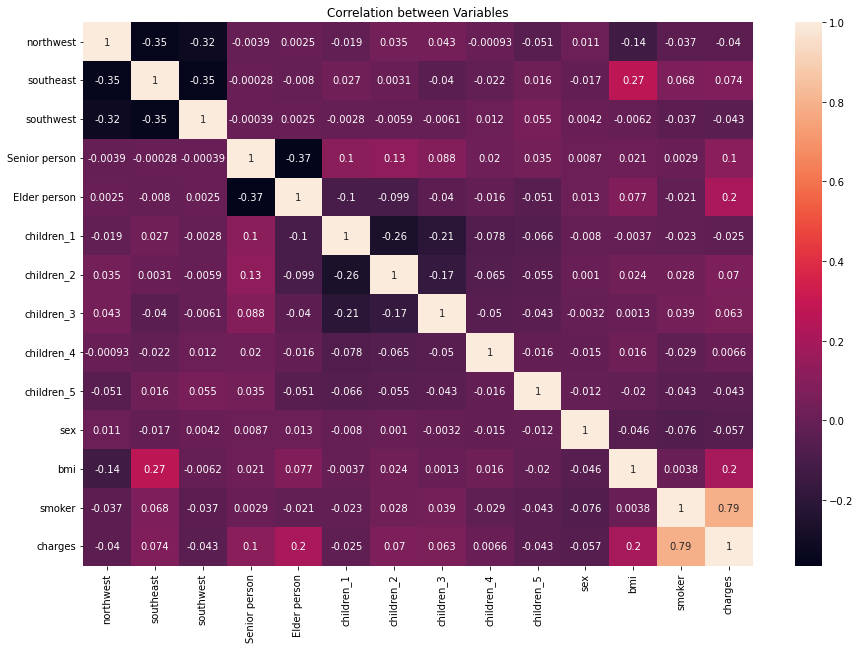

In [80]:
#correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(medical_need_df.corr(), annot=True)
plt.title("Correlation between Variables")
plt.show()

# Step 4: Splitting the data into training and testing set

In [81]:
from sklearn.model_selection import train_test_split
medical_need_train,medical_need__test = train_test_split(medical_need_df,train_size=0.7,random_state=100)

In [82]:
print(medical_need_train.shape)
print(medical_need__test.shape)

(936, 14)
(402, 14)


# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
medical_need_df.head()

,northwest,southeast,southwest,Senior person,Elder person,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker,charges
0,0,0,1,0,0,0,0,0,0,0,1,27.900,1,16884.92400
1,0,1,0,0,0,1,0,0,0,0,0,33.770,0,1725.55230
2,0,1,0,0,0,0,0,1,0,0,0,33.000,0,4449.46200
3,1,0,0,0,0,0,0,0,0,0,0,22.705,0,21984.47061
4,1,0,0,0,0,0,0,0,0,0,0,28.880,0,3866.85520


In [87]:
#object instantiation
scaler = MinMaxScaler()

#create a list of umeric variables
num_vars =['bmi','charges']
#Fit on data
medical_need_train[num_vars] = scaler.fit_transform(medical_need_train[num_vars])
medical_need_train.head()

,northwest,southeast,southwest,Senior person,Elder person,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker,charges
966,1,0,0,1,0,0,1,0,0,0,0,0.237692,1,0.364661
522,0,0,0,1,0,0,0,0,0,0,1,0.483051,0,0.139579
155,1,0,0,1,0,0,0,0,0,0,0,0.633844,0,0.093008
671,0,0,0,0,0,0,0,0,0,0,1,0.408932,0,0.045040
1173,1,0,0,1,0,0,1,0,0,0,0,0.357815,0,0.085173


In [88]:
#Sepearting data inti X and Y
y_train = medical_need_train.pop('charges')
X_train = medical_need_train

In [89]:
y_train

966     0.364661
522     0.139579
155     0.093008
671     0.045040
1173    0.085173
          ...   
802     0.015662
53      0.584542
350     0.170933
79      0.086980
792     0.025700
Name: charges, Length: 936, dtype: float64

In [90]:
X_train

,northwest,southeast,southwest,Senior person,Elder person,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker
966,1,0,0,1,0,0,1,0,0,0,0,0.237692,1
522,0,0,0,1,0,0,0,0,0,0,1,0.483051,0
155,1,0,0,1,0,0,0,0,0,0,0,0.633844,0
671,0,0,0,0,0,0,0,0,0,0,1,0.408932,0
1173,1,0,0,1,0,0,1,0,0,0,0,0.357815,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,0,1,0,0,1,0,0,0,0,0,0.170568,0
53,0,1,0,1,0,0,0,0,0,0,0,0.496906,1
350,1,0,0,0,1,0,0,0,0,0,1,0.194243,0
79,1,0,0,1,0,0,0,0,0,0,1,0.457493,0


# Step 5:Bulding a Linear Model

In [91]:
#import Linear regresion and RFE(Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [103]:
#Runing REF with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
selector = RFE(lm, n_features_to_select=8, step=1)
selector = selector.fit(X_train,y_train)

In [106]:
#list of variables selected
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('northwest', False, 4),
 ('southeast', False, 3),
 ('southwest', False, 2),
 ('Senior person', True, 1),
 ('Elder person', True, 1),
 ('children_1', False, 5),
 ('children_2', True, 1),
 ('children_3', True, 1),
 ('children_4', True, 1),
 ('children_5', True, 1),
 ('sex', False, 6),
 ('bmi', True, 1),
 ('smoker', True, 1)]

In [110]:
#Columns where REF support is TRUE
col = X_train.columns[selector.support_]
col

Index(['Senior person', 'Elder person', 'children_2', 'children_3',
       'children_4', 'children_5', 'bmi', 'smoker'],
      dtype='object')

In [107]:
#coulmns where REF support is false
X_train.columns[~selector.support_]

Index(['northwest', 'southeast', 'southwest', 'children_1', 'sex'], dtype='object')

# Building model using statsmodel,for the detailed statistics

In [111]:
#Creating the X_test dataframe with REF selected variables
X_train_rfe = X_train[col]

In [112]:
#Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [113]:
#Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [115]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     306.4
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          3.32e-254
Time:                        23:31:53   Log-Likelihood:                 813.97
No. Observations:                 936   AIC:                            -1610.
Df Residuals:                     927   BIC:                            -1566.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0166      0.009     -1.747

# Cheaking VIF
Variance Inflation Factor or VIF,gives a basic quantitative idea about how much the feature variable are correlated with each other.It is an extremely important parameter to test our linear model. the formula for calculating VIF is 
VIF = 1/(1-R^2)

In [116]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'],axis = 1)

In [117]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Feature,VIF
6,bmi,2.48
0,Senior person,1.84
1,Elder person,1.32
2,children_2,1.29
7,smoker,1.22
3,children_3,1.17
4,children_4,1.03
5,children_5,1.02


Now lets drop the variable having high p value.We can see children_5 has high p value

In [118]:
#Drop children_5
X_train_new1 = X_train_rfe.drop(['children_5'],axis=1)

#Rebuilding the model


In [119]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     350.1
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          2.42e-255
Time:                        23:54:43   Log-Likelihood:                 813.61
No. Observations:                 936   AIC:                            -1611.
Df Residuals:                     928   BIC:                            -1572.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0159      0.009     -1.680

In [124]:
#Drop constant term Bo
X_train_lm2 = X_train_lm1.drop(['const'],axis=1)

In [132]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new1)
lm2 = sm.OLS(y_train,X_train_lm1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     350.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.42e-255
Time:                        00:09:26   Log-Likelihood:                 813.61
No. Observations:                 936   AIC:                            -1611.
Df Residuals:                     928   BIC:                            -1572.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0159      0.009     -1.680

In [145]:
#Drop constant term Bo
X_train_lm3 = X_train_lm2.drop(['children_3'],axis=1)

In [146]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new1)
lm3 = sm.OLS(y_train,X_train_lm2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     350.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.42e-255
Time:                        00:18:53   Log-Likelihood:                 813.61
No. Observations:                 936   AIC:                            -1611.
Df Residuals:                     928   BIC:                            -1572.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0159      0.009     -1.680

In [125]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_lm2
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Feature,VIF
5,bmi,2.46
0,Senior person,1.84
1,Elder person,1.32
2,children_2,1.29
6,smoker,1.22
3,children_3,1.17
4,children_4,1.03


In [128]:
#Drop constant term Bo
X_train_lm3 = X_train_lm2.drop(['children_3'],axis=1)

In [139]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     350.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.42e-255
Time:                        00:13:28   Log-Likelihood:                 813.61
No. Observations:                 936   AIC:                            -1611.
Df Residuals:                     928   BIC:                            -1572.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0159      0.009     -1.680

In [140]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_lm3
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Feature,VIF
0,const,8.03
1,Senior person,1.18
2,Elder person,1.16
3,children_2,1.07
4,children_3,1.04
5,children_4,1.01
6,bmi,1.01
7,smoker,1.00


In [142]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new1)
lm3 = sm.OLS(y_train,X_train_lm2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     350.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.42e-255
Time:                        00:15:52   Log-Likelihood:                 813.61
No. Observations:                 936   AIC:                            -1611.
Df Residuals:                     928   BIC:                            -1572.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0159      0.009     -1.680

In [149]:
#Drop constant term Bo
X_train_lm4 = X_train_lm3.drop(['children_4'],axis=1)

In [150]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new1)
lm4 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     350.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.42e-255
Time:                        00:19:37   Log-Likelihood:                 813.61
No. Observations:                 936   AIC:                            -1611.
Df Residuals:                     928   BIC:                            -1572.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0159      0.009     -1.680

Our model having acceptable p value and VIF

# step 6: Residual analysis of train data

In [152]:
#Now, to check if the error terms are also normally distributed,we plot histrogram of error and find how it looklike
X_train_lm3 = sm.add_constant(X_train_lm3)
X_train_lm3.head()

,const,Senior person,Elder person,children_2,children_3,children_4,bmi,smoker
966,1.0,1,0,1,0,0,0.237692,1
522,1.0,1,0,0,0,0,0.483051,0
155,1.0,1,0,0,0,0,0.633844,0
671,1.0,0,0,0,0,0,0.408932,0
1173,1.0,1,0,1,0,0,0.357815,0


In [153]:
# y train predict
y_train_pred = lm3.predict(X_train_lm3)

<Figure size 432x288 with 0 Axes>

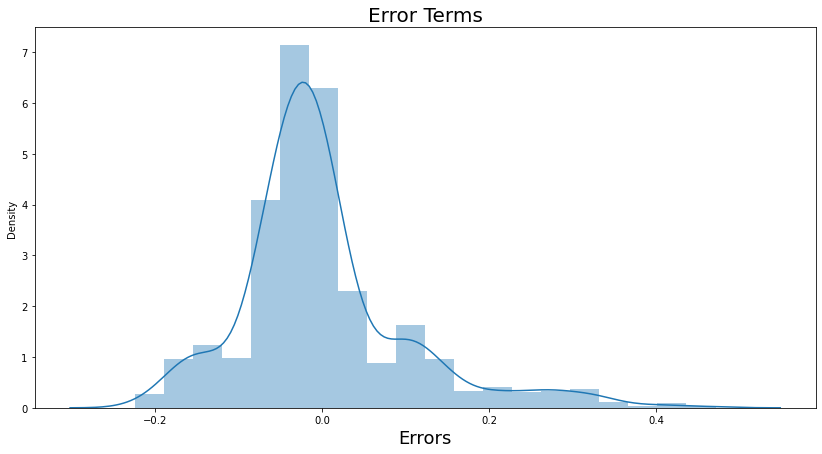

In [155]:
#Plot histogram of th error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train-y_train_pred),bins = 20)
plt.title('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize =18) # X-label
plt.show()

Errors are normally distributed in the above fig.

# Step 7: Making Predictions 

Applying the scaling on the test sets

In [160]:
#Create a list of numeric variables
num_vars = num_vars =['bmi','charges']

#fit on data
medical_need__test[num_vars] = scaler.transform(medical_need__test[num_vars])
medical_need__test.head()

,northwest,southeast,southwest,Senior person,Elder person,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker,charges
12,0,0,1,0,0,0,0,0,0,0,0,0.496099,0,0.011253
306,0,0,1,0,0,0,1,0,0,0,1,0.310465,0,0.304170
318,1,0,0,1,0,0,0,0,0,0,1,0.314366,0,0.100550
815,0,1,0,0,0,0,0,0,0,0,1,0.417003,0,0.012068
157,0,0,0,0,0,0,0,0,0,0,0,0.247915,1,0.229795


In [161]:
#Dividing into X_test and y_test
y_test = medical_need__test.pop('charges')
X_test = medical_need__test
X_test.describe()

,northwest,southeast,southwest,Senior person,Elder person,children_1,children_2,children_3,children_4,children_5,sex,bmi,smoker
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.238806,0.248756,0.243781,0.402985,0.169154,0.256219,0.166667,0.116915,0.012438,0.017413,0.477612,0.387383,0.228856
std,0.426885,0.432831,0.429897,0.491109,0.375355,0.437088,0.373142,0.321720,0.110967,0.130967,0.500121,0.156621,0.420620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023002,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278585,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383105,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.483051,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.890503,1.000000


In [164]:
X_train_lm3.columns

Index(['const', 'Senior person', 'Elder person', 'children_2', 'children_3',
       'children_4', 'bmi', 'smoker'],
      dtype='object')

In [169]:
X_train_lm3 = X_train_lm3.drop(['const'],axis=1 ,inplace= True)

In [172]:
#Now lest use our model to make predictions
#creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]

#Adding a constant variable
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Senior person,Elder person,children_2,children_3,children_4,bmi,smoker
12,1.0,0,0,0,0,0,0.496099,0
306,1.0,0,0,1,0,0,0.310465,0
318,1.0,1,0,0,0,0,0.314366,0
815,1.0,0,0,0,0,0,0.417003,0
157,1.0,0,0,0,0,0,0.247915,1


In [174]:
#Making Predictions
y_pred = lm3.predict(X_test_new1)

# Finding R2 and Adjusted R2 value

In [178]:
#Evaluate R^2 for test
from sklearn.metrics import r2_score
print("R^2=",r2_score(y_test,y_pred))

R^2= 0.7647753234614156


In [179]:
#Adjusted R^2
#adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

#n =sample size, p = number of independent variables
n = X_test.shape[0]
p = X_test.shape[1]

Adj_R2=1-(1-0.7647753234614156)*(n-1)/(n-p-1)
print("Adjusted accuracy=",Adj_R2)

Adjusted accuracy= 0.7568940842990404


# Step 8:Model Evaluation

<Figure size 432x288 with 0 Axes>

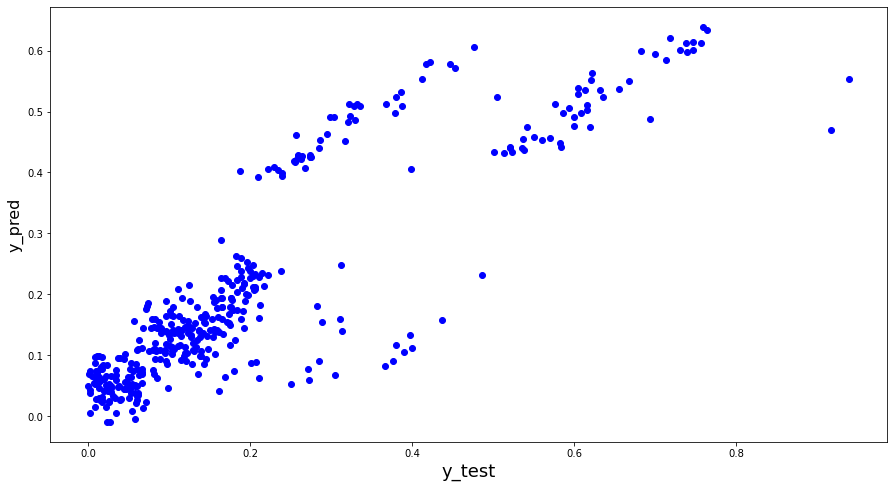

In [180]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color ='blue')
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()

<Figure size 432x288 with 0 Axes>

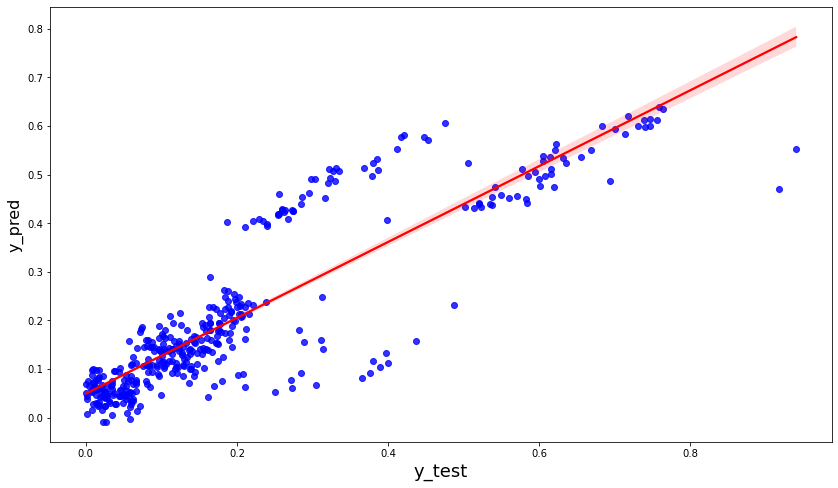

In [183]:
#Regression plot
fig = plt.figure()
plt.figure(figsize=(14,8))
sns.regplot( x=y_test, y=y_pred,ci=68, fit_reg=True,scatter_kws={"color":"blue"}, line_kws={"color":"red"}) 
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()

In [ ]:
Its a best model
equation of best fitted line is:
    charges = 0.3826*smoker+0.077*seniorPerson+0.14*Elder+).176*bmi+0.024*children_2

# Result: 
Smoking seems to have the most influence on the medical charges.
    Age,bmi,no of children and smoking are contribute for the medical charges.
    region and gender do not bring significant difference on charges.

# Pickle the model

In [ ]:
import pickle
filename = 'pickle.pk1'
pickel.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)
pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)